In [160]:
def test_percentage_of_missing_values(MISSSING_PERCENT = 0.9, STRATEGY = 'mean', num_of_runs = 25, verbose = False):
        
    ols_mae_final, ols_mse_final, rf_mae_final, rf_mse_final, svm_acc_final, rf_acc_final = 0, 0, 0, 0, 0, 0

    for i in range(num_of_runs):
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt


        ## READ THE DATA AND PREPARING

        # Read the data
        breast_data = pd.read_csv('breast.data', header=None)
        breast_data.set_index(0, inplace=True)
        breast_data = breast_data.reset_index(drop=True)
        breast_data[10] = np.where(breast_data[10]==4 , 1, 0)

        breast_data[6] = np.where(breast_data[6]=="?" , np.nan, breast_data[6])
        breast_data[6] = breast_data[6].ffill()


        Xb = breast_data.iloc[:, :-1]
        yb = breast_data.iloc[:, -1]

        # spllit the data into training and testing
        from sklearn.model_selection import train_test_split
        Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=0)




        # Read the data
        house_data = pd.read_csv('housing.data', header=None, delim_whitespace=True)

        Xh = house_data.iloc[:, 1:]
        yh = house_data.iloc[:, 0]

        # spllit the data into training and testing
        from sklearn.model_selection import train_test_split
        Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2, random_state=0)




        ## MISSING VALUES GENERATOR

        # Determine the number of missing values to introduce
        n_missing = int(MISSSING_PERCENT * Xb_train.size)

        # Generate random indices to set to missing
        missing_indices = np.random.choice(Xb_train.size, size=n_missing, replace=False)

        XB_values = Xb_train.values.ravel()
        XH_values = Xh_train.values.ravel()

        # Set the chosen indices to missing values
        XB_values[missing_indices] = np.nan
        XH_values[missing_indices] = np.nan

        # Replace the original values with the new values
        Xb_train = pd.DataFrame(XB_values.reshape(Xb_train.shape))
        Xh_train = pd.DataFrame(XH_values.reshape(Xh_train.shape))



        ## HANDLING MISSING VALUES

        # Impute the missing values with the mean
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy=f'{STRATEGY}')
        Xb_train = imp.fit_transform(Xb_train)
        Xh_train = imp.fit_transform(Xh_train)    

        ## MODELING


        from sklearn.linear_model import LinearRegression
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.metrics import mean_absolute_error, mean_squared_error

        # OLS model
        ols = LinearRegression()
        ols.fit(Xh_train, yh_train)
        ols_pred = ols.predict(Xh_test)
        ols_mae = mean_absolute_error(yh_test, ols_pred)
        ols_mse = mean_squared_error(yh_test, ols_pred)

        # Regression random forest model
        rf = RandomForestRegressor(random_state=42)
        rf.fit(Xh_train, yh_train)
        rf_pred = rf.predict(Xh_test)
        rf_mae = mean_absolute_error(yh_test, rf_pred)
        rf_mse = mean_squared_error(yh_test, rf_pred)

        if verbose:
            # Print the results
            print("OLS MAE:", ols_mae)
            print("OLS MSE:", ols_mse)
            print("RF MAE:", rf_mae)
            print("RF MSE:", rf_mse)

        from sklearn.svm import SVC
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score

        # SVM model
        svm = SVC(random_state=42)
        svm.fit(Xb_train, yb_train)
        svm_pred = svm.predict(Xb_test)
        svm_acc = accuracy_score(yb_test, svm_pred)

        # Random forest model
        rf = RandomForestClassifier(random_state=42)
        rf.fit(Xb_train, yb_train)
        rf_pred = rf.predict(Xb_test)
        rf_acc = accuracy_score(yb_test, rf_pred)

        if verbose:
            # Print the results
            print("SVM accuracy:", svm_acc)
            print("RF accuracy:", rf_acc)
        
        ols_mae_final += ols_mae/num_of_runs
        ols_mse_final += ols_mse/num_of_runs
        rf_mae_final += rf_mae/num_of_runs
        rf_mse_final += rf_mse/num_of_runs
        svm_acc_final += svm_acc/num_of_runs
        rf_acc_final += rf_acc/num_of_runs

    return [ols_mae, ols_mse, rf_mae, rf_mse, svm_acc, rf_acc] 





# Results for 'most_frequent' method

In [161]:
OLS_MAE = []
OLS_MSE = []
RF_MAE = []
RF_MSE = []
SVM_ACC = []
RF_ACC = []
LIST_OF_PERC = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in LIST_OF_PERC:
    OLS_MAE_temp, OLS_MSE_temp, RF_MAE_temp, RF_MSE_temp, SVM_ACC_temp, RF_ACC_temp = test_percentage_of_missing_values(i, 'most_frequent', verbose=False)
    OLS_MAE.append(OLS_MAE_temp)
    OLS_MSE.append(OLS_MSE_temp)
    RF_MAE.append(RF_MAE_temp)
    RF_MSE.append(RF_MSE_temp)
    SVM_ACC.append(SVM_ACC_temp)
    RF_ACC.append(RF_ACC_temp)


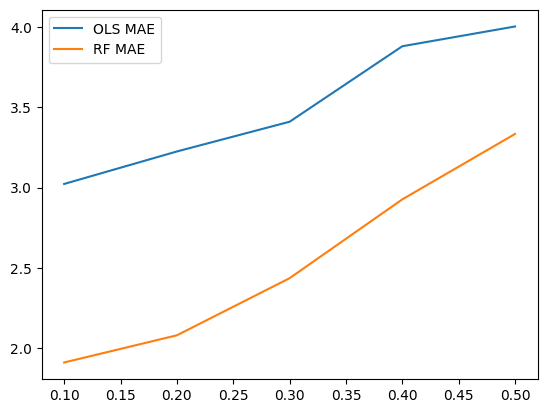

In [162]:
x = np.array(LIST_OF_PERC)
plt.plot(x, OLS_MAE, label = "OLS MAE")
plt.plot(x, RF_MAE, label = "RF MAE")
plt.legend()
plt.show()


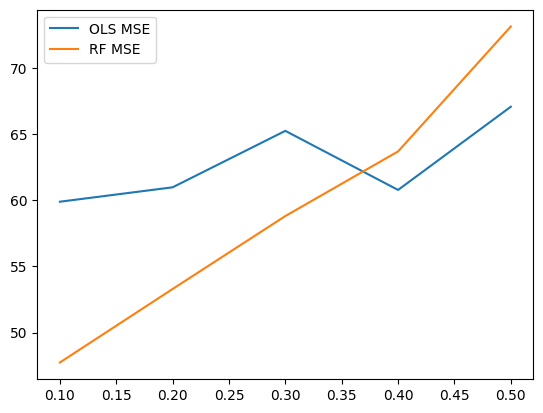

In [163]:
x = np.array(LIST_OF_PERC)
plt.plot(x, OLS_MSE, label = "OLS MSE")
plt.plot(x, RF_MSE, label = "RF MSE")
plt.legend()
plt.show()


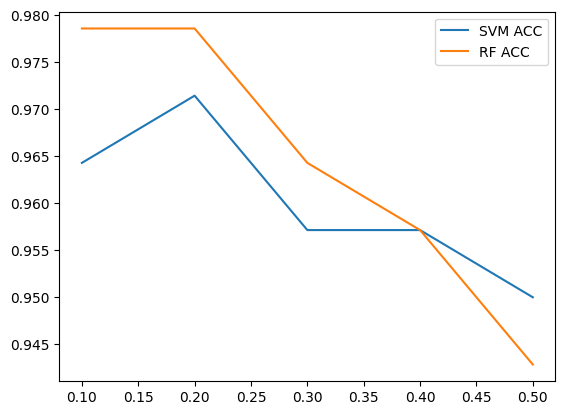

In [164]:
x = np.array(LIST_OF_PERC)
plt.plot(x, SVM_ACC, label = "SVM ACC")
plt.plot(x, RF_ACC, label = "RF ACC")
plt.legend()    
plt.show()

# Results for 'mean' method

In [165]:
OLS_MAE = []
OLS_MSE = []
RF_MAE = []
RF_MSE = []
SVM_ACC = []
RF_ACC = []
for i in LIST_OF_PERC:
    OLS_MAE_temp, OLS_MSE_temp, RF_MAE_temp, RF_MSE_temp, SVM_ACC_temp, RF_ACC_temp = test_percentage_of_missing_values(i, 'mean', verbose=False)
    OLS_MAE.append(OLS_MAE_temp)
    OLS_MSE.append(OLS_MSE_temp)
    RF_MAE.append(RF_MAE_temp)
    RF_MSE.append(RF_MSE_temp)
    SVM_ACC.append(SVM_ACC_temp)
    RF_ACC.append(RF_ACC_temp)


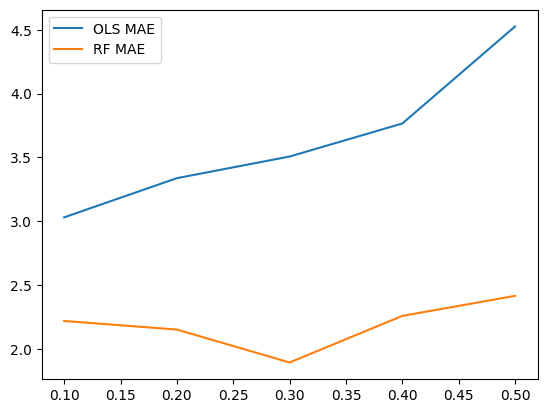

In [166]:
x = np.array(LIST_OF_PERC)
plt.plot(x, OLS_MAE, label = "OLS MAE")
plt.plot(x, RF_MAE, label = "RF MAE")
plt.legend()
plt.show()

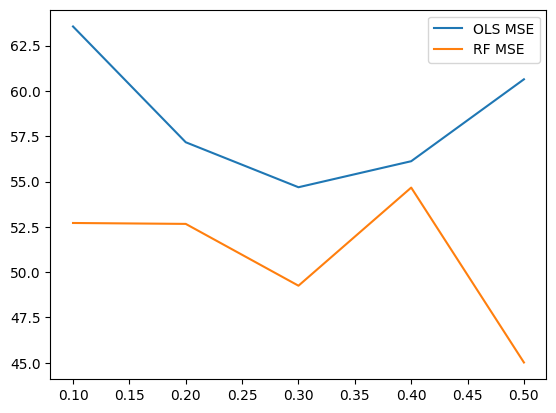

In [167]:
x = np.array(LIST_OF_PERC)
plt.plot(x, OLS_MSE, label = "OLS MSE")
plt.plot(x, RF_MSE, label = "RF MSE")
plt.legend()
plt.show()

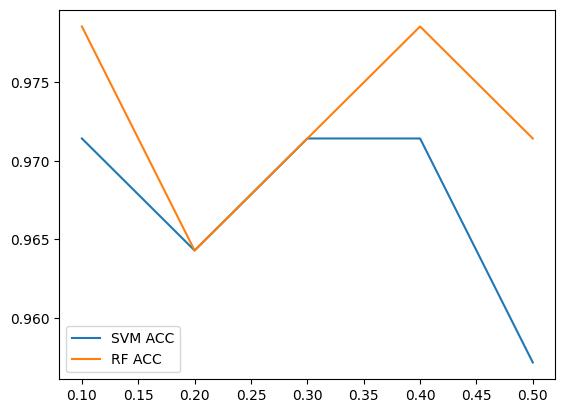

In [168]:
x = np.array(LIST_OF_PERC)
plt.plot(x, SVM_ACC, label = "SVM ACC")
plt.plot(x, RF_ACC, label = "RF ACC")
plt.legend()
plt.show()